<a href="https://colab.research.google.com/github/frcaulia/dicv_odd_2023/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. Import the folder that exist on the drive**

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **2. Import some libraries**

In [20]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

### **3. Make the dilation operation and show the results on the image of the Structuring Element shaped 5 x 5 square without using the OpenCV morphology library, thus generating the results shows in the figure (Use image “j.png”)**

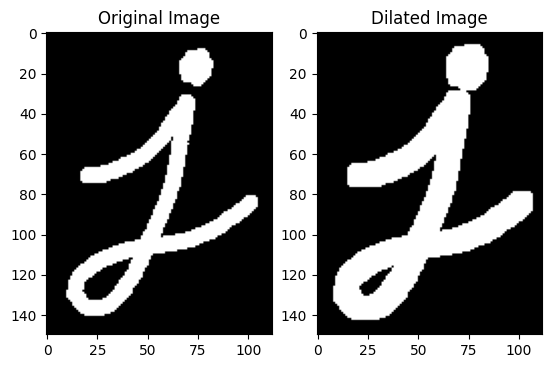

In [21]:
# Load the image
j_image1 = cv.imread('/content/drive/MyDrive/Images/j.png', cv.IMREAD_GRAYSCALE)

# Define the structuring element
kernel = np.ones((5, 5), np.uint8)

# Initialize the resulting dilated image
dilated_image = np.zeros_like(j_image1)

# Get image dimensions
m, n = j_image1.shape

# Get kernel dimensions
k, l = kernel.shape
pad_h, pad_w = k // 2, l // 2

# Perform dilation operation
for i in range(pad_h, m - pad_h):
    for j in range(pad_w, n - pad_w):
        temp = j_image1[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1]
        temp = temp * kernel
        dilated_image[i, j] = np.max(temp)

# Display the image
plt.subplot(1,2,1)
plt.imshow(j_image1, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')

plt.axis('off')
plt.show()

### **4. Make the erosion operation and show the results on the image of the Structuring Element shaped 5 x 5 square without using the OpenCV morphology library, thus generating the results shows in the figure (Use image “j.png”)**

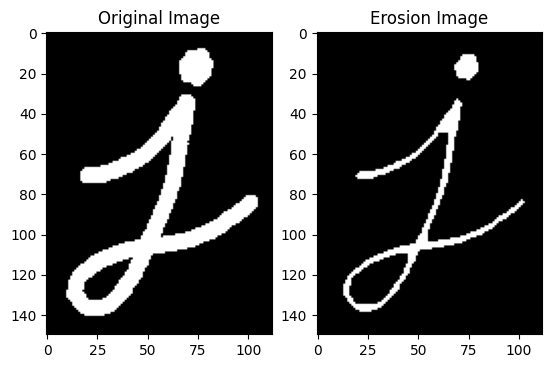

In [22]:
# Load the image
j_image2 = cv.imread('/content/drive/MyDrive/Images/j.png', cv.IMREAD_GRAYSCALE)

# Define the structuring element
kernel = np.ones((5, 5), np.uint8)

# Initialize the resulting eroded image
eroded_image = np.zeros_like(j_image2)

# Get image dimensions
m, n = j_image2.shape

# Perform erosion operation
for i in range(5 // 2, m - 5 // 2):
    for j in range(5 // 2, n - 5 // 2):
        temp = j_image2[i - 5 // 2:i + 5 // 2 + 1, j - 5 // 2:j + 5 // 2 + 1]
        eroded_image[i, j] = np.min(temp)

# Display the image
plt.subplot(1,2,1)
plt.imshow(j_image2, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Erosion Image')

plt.axis('off')
plt.show()

### **5. Make the dilation operation and show the results on the image of the Structuring Element shaped 5 x 5 square using the OpenCV morphology library, thus generating the results shows in the figure (Use image “j.png”)**

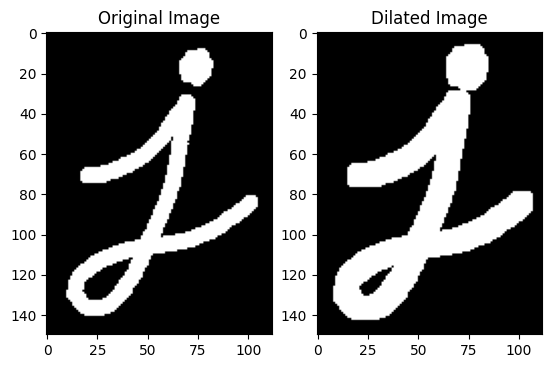

In [23]:
# Load the image
j_image3 = cv.imread('/content/drive/MyDrive/Images/j.png', cv.IMREAD_GRAYSCALE)

# Define the structuring element
kernel = np.ones((5, 5), np.uint8)

# Perform dilation
image_dilated = cv.dilate(j_image3, kernel, iterations=1)

# Display the image
plt.subplot(1, 2, 1)
plt.imshow(j_image3, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(image_dilated, cmap='gray')
plt.title('Dilated Image')

plt.axis('off')
plt.show()

### **6. Make the erotion operation and show the results on the image of the Structuring Element shaped 5 x 5 square using the OpenCV morphology library, thus generating the results shows in the figure (Use image “j.png”)**

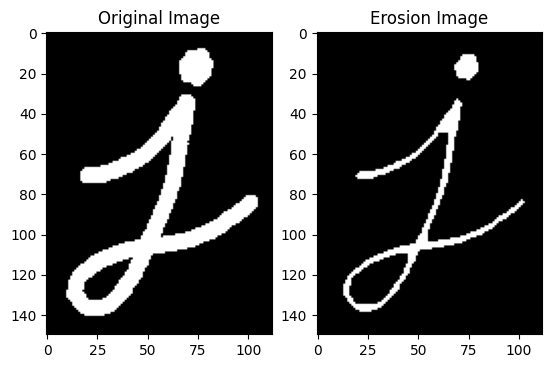

In [24]:
# Load the image
j_image4 = cv.imread('/content/drive/MyDrive/Images/j.png', cv.IMREAD_GRAYSCALE)

# Define the structuring element
kernel = np.ones((5, 5), np.uint8)

# Perform erotion
image_erosion = cv.erode(j_image4, kernel, iterations=1)

# Display the image
plt.subplot(1,2,1)
plt.imshow(j_image4, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(image_erosion, cmap='gray')
plt.title('Erosion Image')

plt.axis('off')
plt.show()

### **7. Make the Opening operation and show the results on the image of the Structuring Element shaped 7 x 7 square with and without using the OpenCV morphology library, thus generating the results shows in the figure (Use image “j.png”)**

**With OpenCV Library**

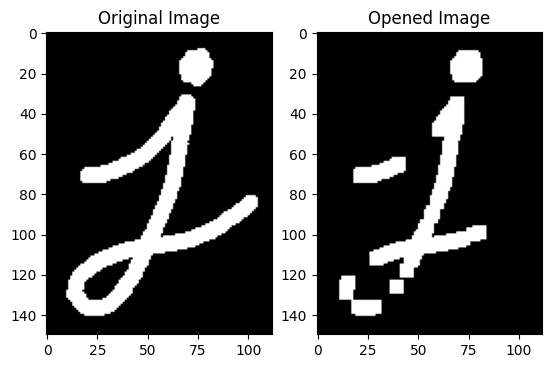

In [28]:
# Read the image
image = cv.imread('/content/drive/MyDrive/Images/j.png', cv.IMREAD_GRAYSCALE)

# Create a structuring element
kernel = np.ones((7, 7), np.uint8)

# Perform the Opening operation
opened_image = cv.morphologyEx(image, cv.MORPH_OPEN, kernel)

# Display the image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(opened_image, cmap='gray')
plt.title('Opened Image')

plt.show()

**Without OpenCV Library**

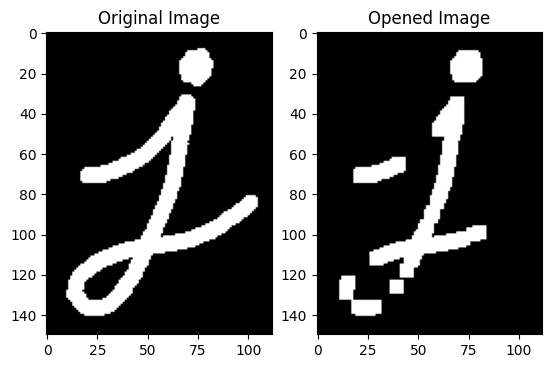

In [37]:
from scipy.ndimage import binary_erosion, binary_dilation

# Load the image
image = cv.imread('/content/drive/MyDrive/Images/j.png', cv.IMREAD_GRAYSCALE)

# Create a structuring element
kernel = np.ones((7, 7), dtype=np.uint8)

# Perform the Opening operation
eroded_image = binary_erosion(image, structure=kernel).astype(np.uint8)
opened_image = binary_dilation(eroded_image, structure=kernel).astype(np.uint8)

# Display the image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(opened_image, cmap='gray')
plt.title('Opened Image')

plt.axis('off')
plt.show()

### **8. Make the Closing operation and show the results on the image of the Structuring Element shaped 7 x 7 square with and without using the OpenCV morphology library, thus generating the results shows in the figure (Use image “j.png”)**

**With OpenCV Library**

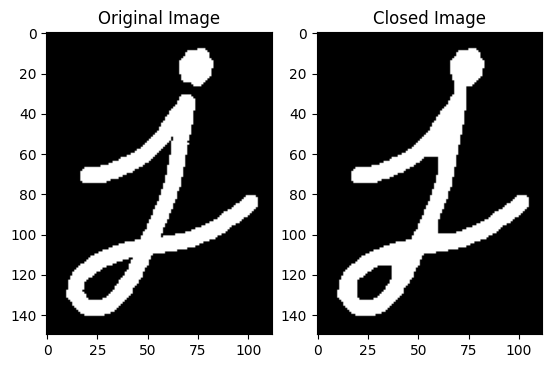

In [38]:
# Read the image using OpenCV
image = cv.imread('/content/drive/MyDrive/Images/j.png', cv.IMREAD_GRAYSCALE)

# Create a structuring element
kernel = np.ones((7, 7), np.uint8)

# Perform the Closing operation using OpenCV
closed_image = cv.morphologyEx(image, cv.MORPH_CLOSE, kernel)

# Display the image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(closed_image, cmap='gray')
plt.title('Closed Image')

plt.axis('off')
plt.show()

**Without OpenCV Library**

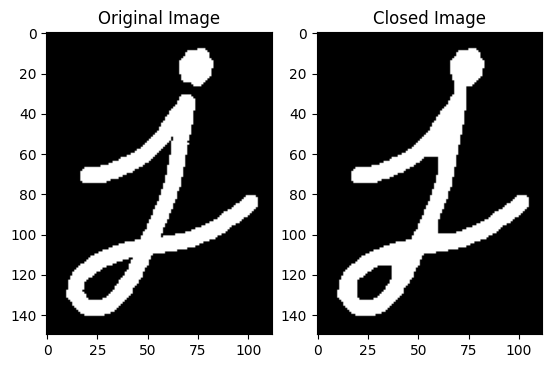

In [39]:
from scipy.ndimage import binary_erosion, binary_dilation

# Read the image
image = cv.imread('/content/drive/MyDrive/Images/j.png', cv.IMREAD_GRAYSCALE)

# Create a structuring element
kernel = np.ones((7, 7), dtype=np.uint8)

# Perform the Closing operation
dilated_image = binary_dilation(image, structure=kernel).astype(np.uint8)
closed_image = binary_erosion(dilated_image, structure=kernel).astype(np.uint8)

# Display the image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(closed_image, cmap='gray')
plt.title('Closed Image')

plt.axis('off')
plt.show()

### **9. Make the Dilation operation and show the results on the image of the Structuring Element shaped 3x3 and 5x5 Cross using the OpenCV morphology library, thus generating the results shows in the figure (Use image “j.png”)**

SED = Cross 3


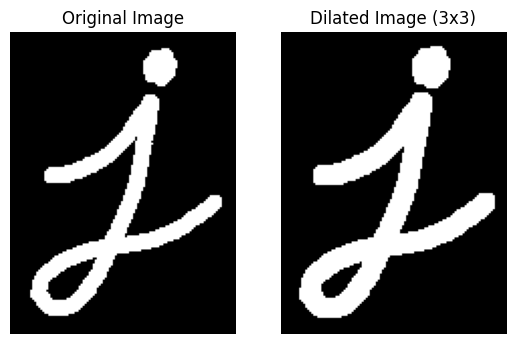

SED = Cross 5


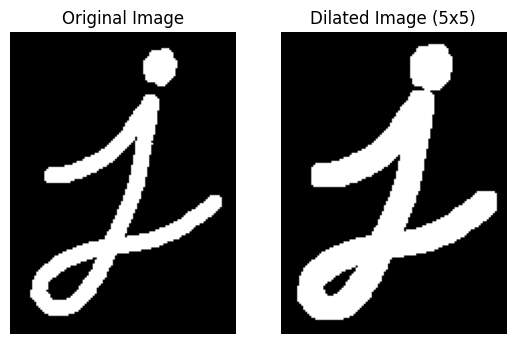

In [51]:
# Read the image using OpenCV
image = cv.imread('/content/drive/MyDrive/Images/j.png', cv.IMREAD_GRAYSCALE)

# Create a structuring element
kernel_3x3 = np.ones((3, 3), dtype=np.uint8)
kernel_5x5 = np.ones((5, 5), dtype=np.uint8)

# Perform Dilation
dilated_3 = cv.dilate(image, kernel_3x3, iterations=1)
dilated_5 = cv.dilate(image, kernel_5x5, iterations=1)

# Cross 3x3
print("SED = Cross 3")

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(dilated_3, cmap='gray')
plt.title('Dilated Image (3x3)')

plt.axis('off')
plt.show()

# Cross 5x5
print("SED = Cross 5")

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(dilated_5, cmap='gray')
plt.title('Dilated Image (5x5)')

plt.axis('off')
plt.show()

### **10. Make the Dilation operation and show the results on the image of the Structuring Element shaped 3x3 and 5x5 Circular using the OpenCV morphology library, thus generating the results shows in the figure (Use image “j.png”)**

SED = Circular 3


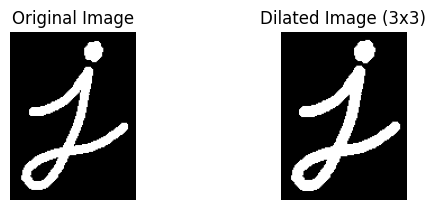

SED = Circular 5


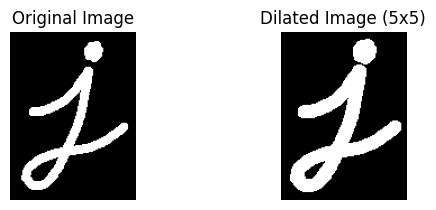

In [52]:
# Read the image using OpenCV
image = cv.imread('/content/drive/MyDrive/Images/j.png', cv.IMREAD_GRAYSCALE)

# Create a structuring element
kernel_3x3 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))
kernel_5x5 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))

# Perform Dilation
dilated_image_3x3 = cv.dilate(image, kernel_3x3, iterations=1)
dilated_image_5x5 = cv.dilate(image, kernel_5x5, iterations=1)

# Circular 3x3
print("SED = Circular 3")

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(dilated_image_3x3, cmap='gray')
plt.title('Dilated Image (3x3)')

plt.axis('off')
plt.show()

# Circular 5x5
print("SED = Circular 5")

plt.subplot(2, 2, 3)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 4)
plt.imshow(dilated_image_5x5, cmap='gray')
plt.title('Dilated Image (5x5)')

plt.axis('off')
plt.show()


### **11. Make the Erotion operation and show the results on the image of the Structuring Element shaped 3x3 and 5x5 Rectangle using the OpenCV morphology library, thus generating the results shows in the figure (Use image “j.png”)**

SED = Rectangle 3


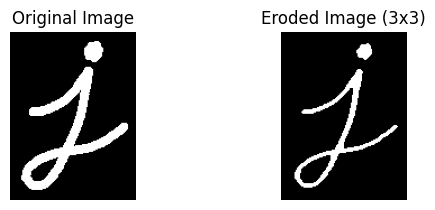

SED = Rectangle 5


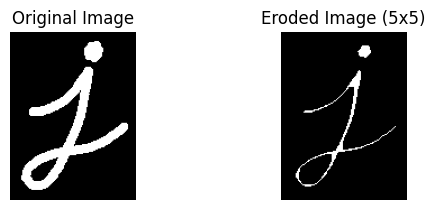

In [55]:
# Read the image using OpenCV
image = cv.imread('/content/drive/MyDrive/Images/j.png', cv.IMREAD_GRAYSCALE)

# Create a structuring element
kernel_3x3 = cv.getStructuringElement(cv.MORPH_RECT, (3, 5))
kernel_5x5 = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))

# Perform Erosion
eroded_image_3x3 = cv.erode(image, kernel_3x3, iterations=1)
eroded_image_5x5 = cv.erode(image, kernel_5x5, iterations=1)

# Rectangle 3x3 Erosion
print("SED = Rectangle 3")

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(eroded_image_3x3, cmap='gray')
plt.title('Erotion Image (3x3)')

plt.axis('off')
plt.show()

# Rectangle 5x5 Erosion
print("SED = Rectangle 5")

plt.subplot(2, 2, 3)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 4)
plt.imshow(eroded_image_5x5, cmap='gray')
plt.title('Erotion Image (5x5)')

plt.axis('off')
plt.show()

### **12. Make the Dilation operation and show the results on the image of the Structuring Element shaped 3 and 5 Line Vertical using the OpenCV morphology library, thus generating the results shows in the figure (Use image “j.png”)**

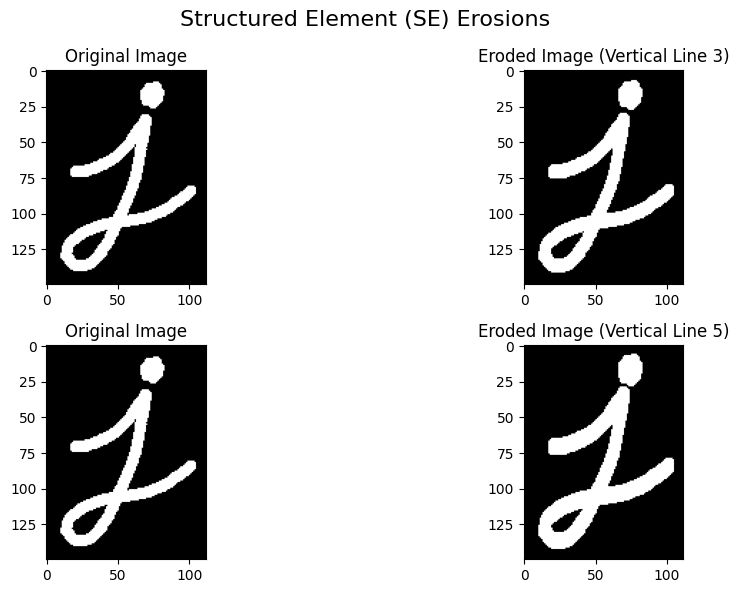

In [58]:
# Read the image using OpenCV
image = cv.imread('/content/drive/MyDrive/Images/j.png', cv.IMREAD_GRAYSCALE)

# Create a structuring element
kernel_3 = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))
kernel_5 = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))

# Perform Dilation
dilated_image_3 = cv.dilate(image, kernel_3, iterations=1)
dilated_image_5 = cv.dilate(image, kernel_5, iterations=1)

# Display the results
plt.figure(figsize=(12, 6))

# Vertical Line 3
print("SED = Vertical Line 3")

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(dilated_image_3, cmap='gray')
plt.title('Dilation Image (Vertical Line 3)')

plt.axis('off')
plt.show()

# Vertical Line 5
print("SED = Vertical Line 5")

plt.subplot(2, 2, 3)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 4)
plt.imshow(dilated_image_5, cmap='gray')
plt.title('Dilation Image (Vertical Line 5)')

plt.axis('off')
plt.show()